In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import rasterio
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm
import time
from scipy.stats import pearsonr

## RWI

In [12]:
mandal_boundaries = gpd.read_file('../../../../../../src/data_preprocessing/base_geojson/TS_mandal_boundary.json')
mandal_boundaries = mandal_boundaries.reset_index()

district_boundaries = gpd.read_file('../../../../../../src/data_preprocessing/base_geojson/TS_district_boundary.json')
district_boundaries = district_boundaries.reset_index()

RWI_mandal = gpd.read_file('../../../relative_wealth_index/result/RWI_mandal.json')
RWI_district = gpd.read_file('../../../relative_wealth_index/result/RWI_district.json')

'''
RWI_mandal['median'] = 0
for i in range(0, len(RWI_mandal)):
    RWI_mandal['median'].iloc[i] = RWI_mandal['zonalstat'].iloc[i]['median']


RWI_district['median'] = 0
for i in range(0, len(RWI_district)):
    RWI_district['median'].iloc[i] = RWI_district['zonalstat'].iloc[i]['median']
'''

"\nRWI_mandal['median'] = 0\nfor i in range(0, len(RWI_mandal)):\n    RWI_mandal['median'].iloc[i] = RWI_mandal['zonalstat'].iloc[i]['median']\n\n\nRWI_district['median'] = 0\nfor i in range(0, len(RWI_district)):\n    RWI_district['median'].iloc[i] = RWI_district['zonalstat'].iloc[i]['median']\n"

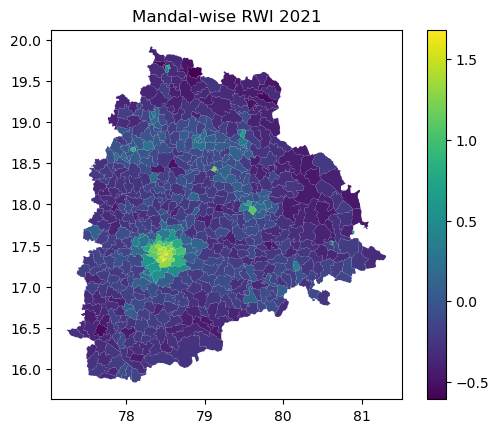

In [18]:
RWI_mandal.plot(column = 'rwi', legend = True)
plt.title('Mandal-wise RWI 2021')
plt.savefig('result/RWI Mandal 2021.png', bbox_inches='tight')
plt.show()

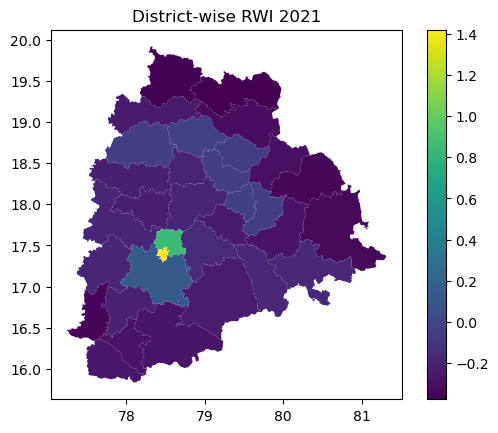

In [19]:
RWI_district.plot(column = 'rwi', legend = True)
plt.title('District-wise RWI 2021')
plt.savefig('result/RWI District 2021.png', bbox_inches='tight')
plt.show()

In [20]:
fire_data_classified = pd.read_csv('../../Classification_Fires/fires_data_classified.csv', index_col=0)
#Select only the agricultural fires
fire_data = fire_data_classified[fire_data_classified['agricultural'] == 1]

In [21]:
fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'])
fire_data_2021 = fire_data[(fire_data['acq_date']>'2020-01-01') & (fire_data['acq_date']<'2022-01-01')]

In [22]:
geo_fire_data_2021 = gpd.GeoDataFrame(fire_data_2021,geometry = gpd.points_from_xy(fire_data_2021.longitude,fire_data_2021.latitude), crs = {'init': 'epsg:4326'}) 
fires_per_boundaries= gpd.sjoin(geo_fire_data_2021, mandal_boundaries, how="inner")
fires_per_boundaries = fires_per_boundaries.groupby('index')['fireID'].count().reset_index()

In [23]:
#RWI_mandal = RWI_mandal.reset_index()
#RWI_district = RWI_district.reset_index()

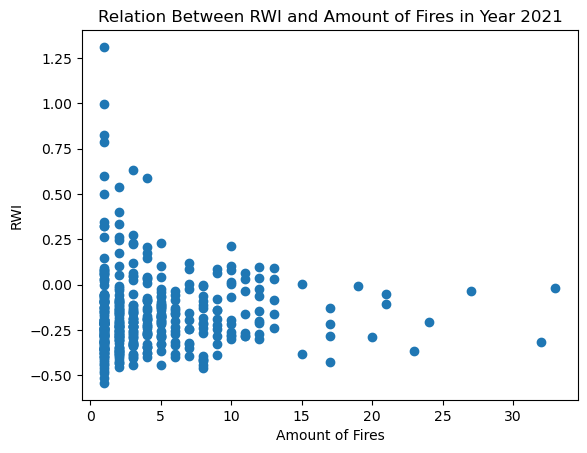

Pearsons correlation: 0.007


In [27]:
Corr = RWI_mandal.merge(fires_per_boundaries[['fireID', 'index']], how = 'left', on = ['index'])
Corr = Corr.dropna()

plt.scatter(Corr['fireID'], Corr['rwi'])
plt.title('Relation Between RWI and Amount of Fires in Year 2021')
plt.xlabel('Amount of Fires')
plt.ylabel('RWI')
plt.savefig('result/Relation between RWI and Amount of Fires in Year 2021.png', bbox_inches='tight')
plt.show()


corr, _ = pearsonr(Corr['fireID'], Corr['rwi'])
print('Pearsons correlation: %.3f' % corr)

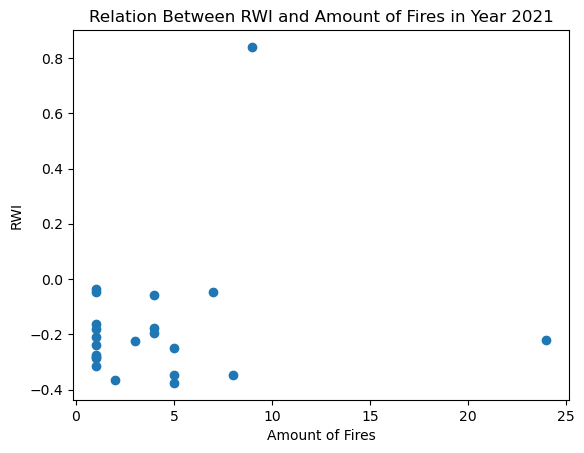

Pearsons correlation: 0.175


In [29]:
Corr = RWI_district.merge(fires_per_boundaries[['fireID', 'index']], how = 'left', on = ['index'])
Corr = Corr.dropna()

plt.scatter(Corr['fireID'], Corr['rwi'])
plt.title('Relation Between RWI and Amount of Fires in Year 2021')
plt.xlabel('Amount of Fires')
plt.ylabel('RWI')
#os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\DPPD_Jesse\\RWI\\result')
plt.savefig('result/Relation between RWI and Amount of Fires in Year 2021 district level.png', bbox_inches='tight')
plt.show()


corr, _ = pearsonr(Corr['fireID'], Corr['rwi'])
print('Pearsons correlation: %.3f' % corr)